### Import your librares

In [182]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load your dfset

In [183]:
df = pd.read_csv('seattle_weather.csv')
df

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


### Handle missing df in PRCP and RAIN columns

In [184]:
df.var()

C:\Users\v3vga\AppData\Local\Temp\ipykernel_8512\1568254755.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.var()


PRCP      0.057136
TMAX    163.149112
TMIN     79.082528
RAIN      0.244629
dtype: float64

In [185]:
df[df['RAIN'].isnull()]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [186]:
df.RAIN.ffill(inplace=True)
df.PRCP.ffill(inplace=True)
df.isnull().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

In [187]:
df.var()

C:\Users\v3vga\AppData\Local\Temp\ipykernel_8512\1568254755.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.var()


PRCP      0.057131
TMAX    163.149112
TMIN     79.082528
RAIN      0.244622
dtype: float64

### Repeat the following steps for each column within outliers

* Visualize the outliers
* Detect if your df set contains any outliers
* Identify lower & higher limit of outliers
* Drop all outliers
* Visualize the column after processing


In [188]:
df.describe()

,PRCP,TMAX,TMIN
count,25551.000000,25551.000000,25551.000000
mean,0.106209,59.544206,44.514226
std,0.239020,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


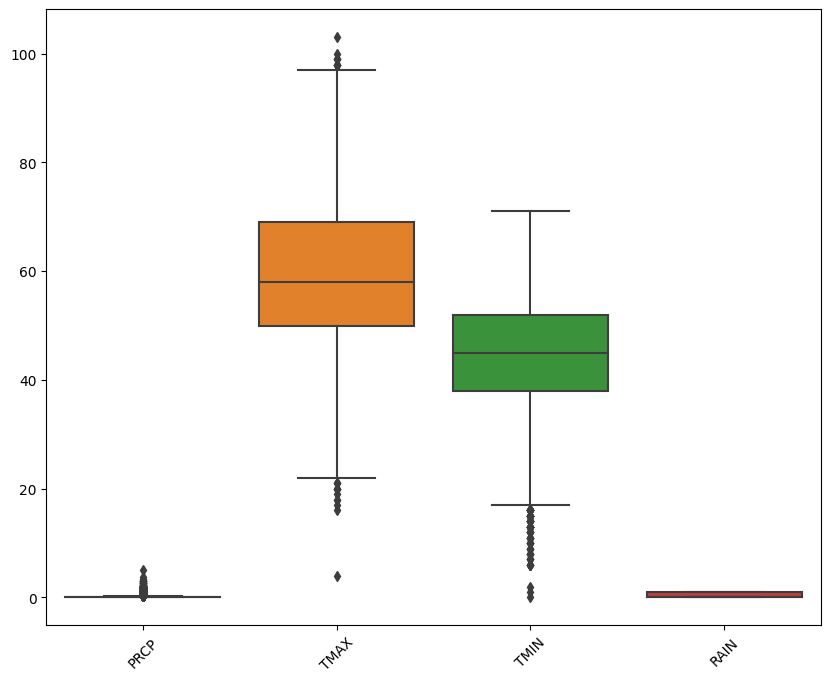

In [189]:
# Visualize the outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()


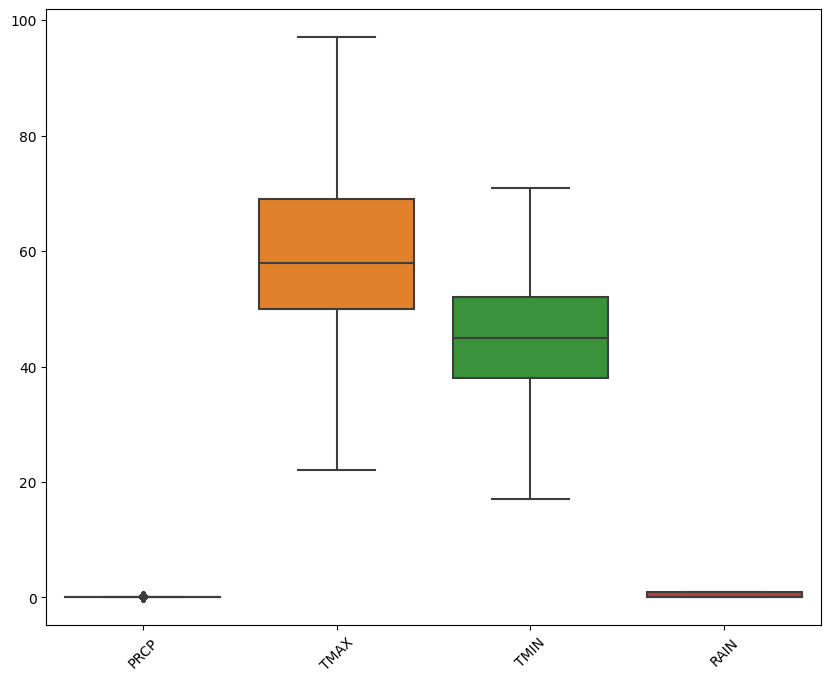

In [190]:
# Function to hanlde the outliers in each column.
def outliers(col):
    Q1 = np.percentile(col, 25)
    Q3 = np.percentile(col, 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    col = col[(col >= lower_bound) & (col <= upper_bound)]
    return col
# Call function for each column
df['TMAX'] = outliers(df['TMAX'])
df['TMIN'] = outliers(df['TMIN'])
df['PRCP'] = outliers(df['PRCP'])

# After dropping outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

In [191]:
df.var()

C:\Users\v3vga\AppData\Local\Temp\ipykernel_8512\1568254755.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.var()


PRCP      0.003505
TMAX    161.748494
TMIN     75.529794
RAIN      0.244622
dtype: float64